<a href="https://colab.research.google.com/github/DanielleK2003/Finance-in-Africa/blob/main/Apple_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Apple stock data from 2020 to 2025
data = yf.download("AAPL", start="2020-01-01", end="2025-01-01")

# Show first 5 rows
data.head()

/tmp/ipython-input-2118040417.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763733,72.523762,71.539345,71.696175,146322800
2020-01-06,72.335579,72.374185,70.634562,70.885494,118387200
2020-01-07,71.995338,72.600945,71.775773,72.345189,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


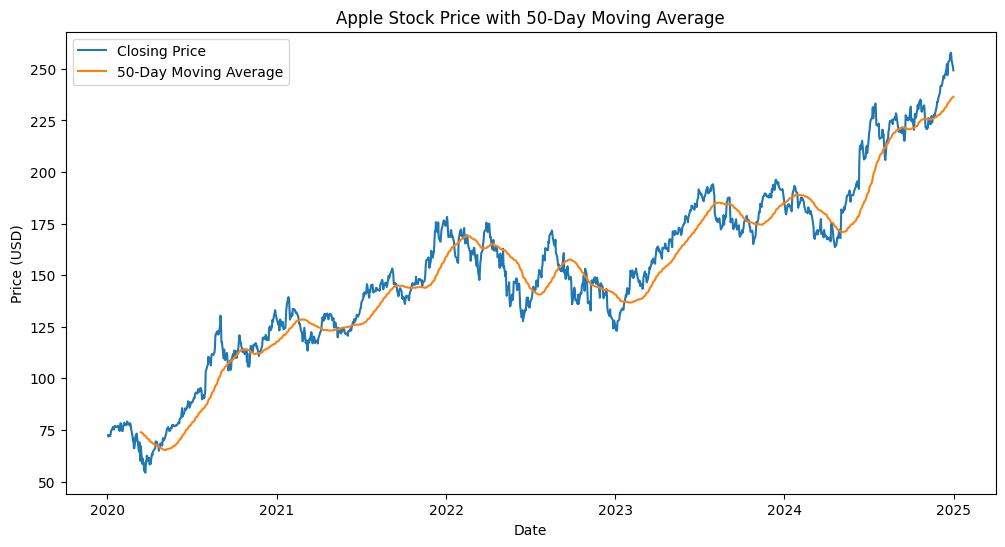

In [10]:
# Plot Apple closing price moving average
data['MA50'] = data['Close'].rolling(50).mean() # We are using 50 days as it's the medium term. 20 days(short term) or 200 days(long term) could be used

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA50'], label='50-Day Moving Average')
plt.title("Apple Stock Price with 50-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

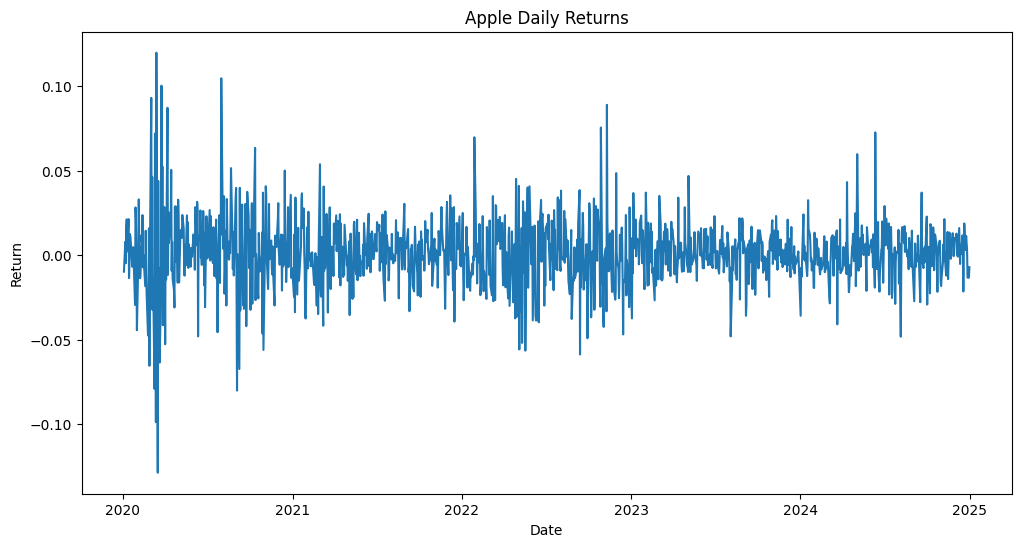

In [11]:
# Calculate daily returns and plot it

data['Return'] = data['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(data['Return'])
plt.title("Apple Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# We will use previous day's closing price to predict the next day's closing price
data = data.dropna()  # remove any missing values
data['Prev_Close'] = data['Close'].shift(1)  # previous day's close
data = data.dropna()  # drop first row which has NaN

# Features and target
X = data[['Prev_Close']]  # feature: previous day close
y = data['Close']         # target: today close

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

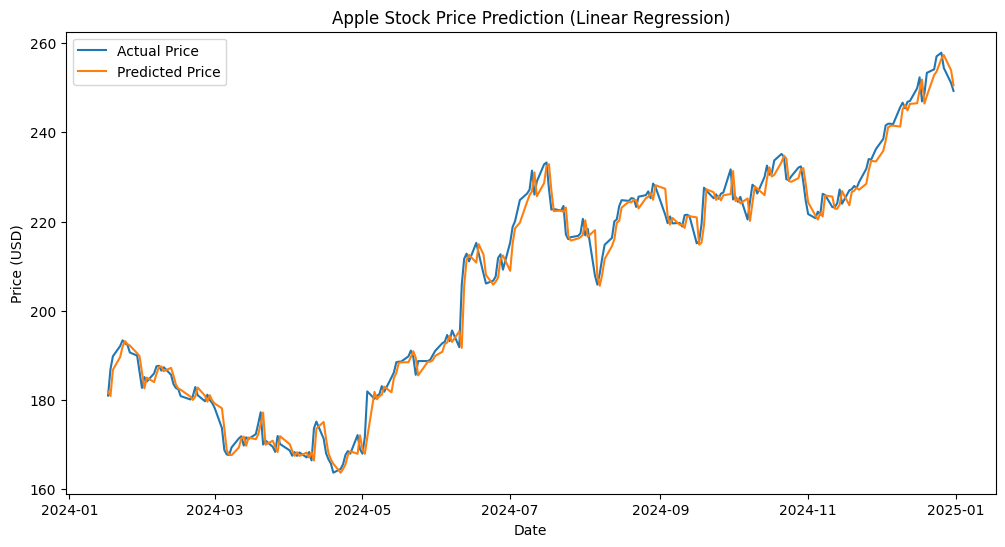

In [14]:
# Compare predicted vs actual prices

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.title("Apple Stock Price Prediction (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [15]:
# Evaluate the model

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 8.58
R² Score: 0.99


# Result of the simple Linear Regression model

*   Mean Squared Error (MSE): 8.58 → the predicted price is very close to the actual price.
*   R² Score: 0.99 → 99% of the variance in Apple’s stock price is explained by the model.

Interpretation:
The model is doing a very good job at capturing the trend of Apple’s stock based on the previous day.